# Task 1: Implementing and Evaluating a Random Forest Classifier

### Step 1: Data Loading and Preprocessing

In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 2: Decision Tree Implementation

Decision Tree - Accuracy: 0.9473684210526315, Precision: 0.9577464788732394, Recall: 0.9577464788732394, F1-Score: 0.9577464788732394


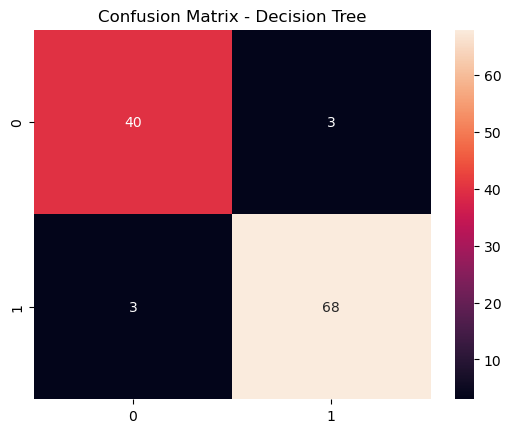

In [4]:
# Importing necessary libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f'Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1-Score: {f1_dt}')

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


### Step 3: Random Forest Implementation

Random Forest - Accuracy: 0.9649122807017544, Precision: 0.958904109589041, Recall: 0.9859154929577465, F1-Score: 0.9722222222222222


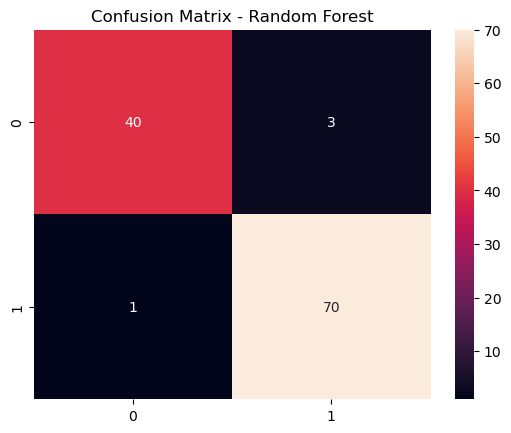

In [6]:
# Importing necessary libraries for random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}')

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()


### Step 4: Hyperparameter Tuning using Grid Search

##### Grid Search to Experiment with Different Hyperparameters 
##### &
##### Use Cross-Validation to Find the Best Set of Hyperparameters

In [8]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'max_depth': [10, 20, 30, None],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters found through Grid Search
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


##### Train the Random Forest Model with the Optimal Parameters

In [10]:
# Train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate the model using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)

print(f'Random Forest (Best) - Accuracy: {accuracy_rf_best}, Precision: {precision_rf_best}, Recall: {recall_rf_best}, F1-Score: {f1_rf_best}')

Random Forest (Best) - Accuracy: 0.9649122807017544, Precision: 0.958904109589041, Recall: 0.9859154929577465, F1-Score: 0.9722222222222222


##### Present the Results of Tuning

In [12]:
# Present the results of tuning
print(f"The best combination of hyperparameters found by Grid Search was: {best_params}.")

The best combination of hyperparameters found by Grid Search was: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.


In [13]:
# Provide reasoning for the best parameters
print(f"This combination gave the highest cross-validation score, indicating that the model performs best with "
      f"{best_params['n_estimators']} trees, a max depth of {best_params['max_depth']}, a minimum split of {best_params['min_samples_split']} "
      f"and a minimum of {best_params['min_samples_leaf']} samples per leaf. These settings balance model complexity and regularization.")

This combination gave the highest cross-validation score, indicating that the model performs best with 200 trees, a max depth of 10, a minimum split of 2 and a minimum of 1 samples per leaf. These settings balance model complexity and regularization.


In [14]:
# Output the performance of the final tuned model
print(f"After training the model with these hyperparameters, the performance on the test set is:")
print(f"Accuracy: {accuracy_rf_best}, Precision: {precision_rf_best}, Recall: {recall_rf_best}, F1-Score: {f1_rf_best}.")

After training the model with these hyperparameters, the performance on the test set is:
Accuracy: 0.9649122807017544, Precision: 0.958904109589041, Recall: 0.9859154929577465, F1-Score: 0.9722222222222222.


### Step 5: Model Comparison

In [16]:
# Importing necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Evaluate the Random Forest model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)

# Print comparison results
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1-Score: {f1_dt}\n")

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf_best}, Precision: {precision_rf_best}, Recall: {recall_rf_best}, F1-Score: {f1_rf_best}")


Decision Tree Performance:
Accuracy: 0.9473684210526315, Precision: 0.9577464788732394, Recall: 0.9577464788732394, F1-Score: 0.9577464788732394

Random Forest Performance:
Accuracy: 0.9649122807017544, Precision: 0.958904109589041, Recall: 0.9859154929577465, F1-Score: 0.9722222222222222


##### Which Model Performed Better and Why?
Based on the results, the Random Forest model outperforms the Decision Tree model in all metrics:

**Accuracy:** The Random Forest (96.49%) is more accurate than the Decision Tree (94.73%), meaning it correctly predicts more instances.
**Precision:** The Random Forest (95.89%) has higher precision, indicating fewer false positives.
**Recall:** The Random Forest (98.59%) has a higher recall, meaning it successfully identifies more true positives.
**F1-Score:** The Random Forest's F1-Score (97.22%) is also higher, showing a better balance between precision and recall.

##### Why did Random Forest perform better?
The Random Forest is an ensemble method that aggregates the results of multiple decision trees, which helps reduce overfitting that a single Decision Tree model often suffers from.

By averaging the predictions of multiple trees, Random Forest reduces variance and improves generalization, leading to higher accuracy and more robust performance across all evaluation metrics.

# Task 2: Cross-Selling Recommendation with Apriori

### Step 1: Frequent Itemsets and Association Rules

In [36]:
import itertools
from collections import defaultdict

# Load the dataset
with open('crossselling.txt', 'r') as f:
    transactions = [line.strip().split() for line in f.readlines()]

# Function to generate frequent itemsets (pairs and triplets)
def apriori(transactions, min_support):
    itemset_counts = defaultdict(int)
    for transaction in transactions:
        for item in set(transaction):
            itemset_counts[frozenset([item])] += 1
    
    # Generate frequent pairs
    pairs_counts = defaultdict(int)
    for transaction in transactions:
        for pair in itertools.combinations(set(transaction), 2):
            pairs_counts[frozenset(pair)] += 1
    
    # Generate frequent triplets
    triplets_counts = defaultdict(int)
    for transaction in transactions:
        for triplet in itertools.combinations(set(transaction), 3):
            triplets_counts[frozenset(triplet)] += 1
    
    frequent_items = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support}
    frequent_pairs = {pair: count for pair, count in pairs_counts.items() if count >= min_support}
    frequent_triplets = {triplet: count for triplet, count in triplets_counts.items() if count >= min_support}
    
    return frequent_items, frequent_pairs, frequent_triplets

# Set minimum support = 100
min_support = 100
frequent_items, frequent_pairs, frequent_triplets = apriori(transactions, min_support)

# Display the number of frequent singletons, pairs, and triplets
print(f'Number of frequent singletons: {len(frequent_items)}')
print(f'Number of frequent pairs: {len(frequent_pairs)}')
print(f'Number of frequent triplets: {len(frequent_triplets)}')

# Generate association rules from pairs and triplets
def generate_rules(frequent_pairs, frequent_triplets):
    rules_pairs = []
    rules_triplets = []
    
    # Rules for pairs
    for pair, support in frequent_pairs.items():
        X, Y = list(pair)
        confidence_X_to_Y = support / frequent_items[frozenset([X])]
        confidence_Y_to_X = support / frequent_items[frozenset([Y])]
        rules_pairs.append((X, Y, confidence_X_to_Y))
        rules_pairs.append((Y, X, confidence_Y_to_X))
    
    # Rules for triplets
    for triplet, support in frequent_triplets.items():
        X, Y, Z = list(triplet)
        confidence_XY_to_Z = support / frequent_pairs[frozenset([X, Y])]
        confidence_XZ_to_Y = support / frequent_pairs[frozenset([X, Z])]
        confidence_YZ_to_X = support / frequent_pairs[frozenset([Y, Z])]
        rules_triplets.append((f'{X}, {Y} -> {Z}', confidence_XY_to_Z))
        rules_triplets.append((f'{X}, {Z} -> {Y}', confidence_XZ_to_Y))
        rules_triplets.append((f'{Y}, {Z} -> {X}', confidence_YZ_to_X))
    
    sorted_pairs = sorted(rules_pairs, key=lambda x: -x[2])
    sorted_triplets = sorted(rules_triplets, key=lambda x: -x[1])
    
    return sorted_pairs, sorted_triplets

# Generate and display top 5 rules sorted by confidence for pairs and triplets
rules_pairs, rules_triplets = generate_rules(frequent_pairs, frequent_triplets)

print("Top 5 rules for pairs with support 100:")
for rule in rules_pairs[:5]:
    print(f'{rule[0]} -> {rule[1]}: Confidence = {rule[2]}')

print("\nTop 5 rules for triplets with support 100:")
for rule in rules_triplets[:5]:
    print(f'{rule[0]}: Confidence = {rule[1]}')

Number of frequent singletons: 647
Number of frequent pairs: 1334
Number of frequent triplets: 233
Top 5 rules for pairs with support 100:
DAI93865 -> FRO40251: Confidence = 1.0
GRO85051 -> FRO40251: Confidence = 0.999176276771005
GRO38636 -> FRO40251: Confidence = 0.9906542056074766
ELE12951 -> FRO40251: Confidence = 0.9905660377358491
DAI88079 -> FRO40251: Confidence = 0.9867256637168141

Top 5 rules for triplets with support 100:
DAI62779, DAI88079 -> FRO40251: Confidence = 1.0
GRO85051, GRO73461 -> FRO40251: Confidence = 1.0
GRO85051, GRO38814 -> FRO40251: Confidence = 1.0
GRO85051, ELE26917 -> FRO40251: Confidence = 1.0
SNA80324, GRO85051 -> FRO40251: Confidence = 1.0


### Step 2: Repeat with Higher Minimum Support

In [37]:
# Set minimum support = 250
min_support_250 = 250
frequent_items_250, frequent_pairs_250, frequent_triplets_250 = apriori(transactions, min_support_250)

# Display number of frequent singletons, pairs, and triplets
print(f'Number of frequent singletons with support 250: {len(frequent_items_250)}')
print(f'Number of frequent pairs with support 250: {len(frequent_pairs_250)}')
print(f'Number of frequent triplets with support 250: {len(frequent_triplets_250)}')

# Generate and display top 5 rules sorted by confidence for pairs and triplets
rules_pairs_250, rules_triplets_250 = generate_rules(frequent_pairs_250, frequent_triplets_250)

print("\nTop 5 rules for pairs with support 250:")
for rule in rules_pairs_250[:5]:
    print(f'{rule[0]} -> {rule[1]}: Confidence = {rule[2]}')

print("\nTop 5 rules for triplets with support 250:")
for rule in rules_triplets_250[:5]:
    print(f'{rule[0]}: Confidence = {rule[1]}')

Number of frequent singletons with support 250: 287
Number of frequent pairs with support 250: 188
Number of frequent triplets with support 250: 26

Top 5 rules for pairs with support 250:
GRO85051 -> FRO40251: Confidence = 0.999176276771005
DAI88079 -> FRO40251: Confidence = 0.9867256637168141
FRO92469 -> FRO40251: Confidence = 0.983510011778563
DAI43868 -> SNA82528: Confidence = 0.972972972972973
DAI23334 -> DAI62779: Confidence = 0.9545454545454546

Top 5 rules for triplets with support 250:
SNA80324, GRO85051 -> FRO40251: Confidence = 1.0
GRO85051, DAI75645 -> FRO40251: Confidence = 1.0
GRO85051, DAI62779 -> FRO40251: Confidence = 0.9973821989528796
DAI75645, FRO92469 -> FRO40251: Confidence = 0.98046875
SNA80324, FRO92469 -> FRO40251: Confidence = 0.9744318181818182


### Step 3: Analysis and Insights

In [38]:
# Analyze outcomes of both experiments
print("\nAnalysis:")
print(f"With support 100, we found {len(frequent_pairs)} frequent pairs and {len(frequent_triplets)} frequent triplets.")
print(f"With support 250, we found {len(frequent_pairs_250)} frequent pairs and {len(frequent_triplets_250)} frequent triplets.")
print("Increasing the support threshold reduces the number of frequent itemsets (pairs and triplets), but increases the confidence of the generated rules.")


Analysis:
With support 100, we found 1334 frequent pairs and 233 frequent triplets.
With support 250, we found 188 frequent pairs and 26 frequent triplets.
Increasing the support threshold reduces the number of frequent itemsets (pairs and triplets), but increases the confidence of the generated rules.


1.	**Frequent Itemsets and Rules (Support = 100):**
  
	•	More frequent itemsets and rules are generated.


	•	However, some of these rules may have lower confidence.

2.	**Frequent Itemsets and Rules (Support = 250):**

  
	•	Fewer frequent itemsets and rules.


	•	Higher confidence in the remaining rules as the itemsets occur more frequently.